# <font color='blue'>Portfólio - Preço de Casa - Regressão Linear Simples</font>

# Regressão Linear do zero

In [31]:
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline

In [32]:
base = pd.read_csv('dataframe1.csv')

In [33]:
base.head()

,Unnamed: 0,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,vista,condicao,nota,ano_construcao,reforma
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,64,0
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,68,28
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,86,0
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,54,0
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,32,0


In [34]:
X = base.iloc[:, 4:5].values
Y = base.iloc[:, 1].values

In [35]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 0)

# Prevendo o Preço das Casas

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [39]:
regressor.fit(X_treino,Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
score = regressor.score(X_treino,Y_treino)

### O método fit() do módulo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples:

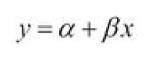

In [38]:
from IPython.display import Image
Image('linear.png')

### Y – é o valor previsto da variável dependente (preço das casas)
### X – é a variável explanatória (tamanho ta casa)
### Alfa é o termo de intercepção ou coeficiente linear
### Beta é o coeficiente de cada variável ou coeficiente angular

## Alfa e Beta são parâmetros do modelo que são aprendidos pelo algoritmo de aprendizagem.

In [41]:
score

0.49453356717789776

In [42]:
previssoes = regressor.predict(X_teste)
previssoes
Y_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [43]:
Y_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [44]:
previssoes

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [45]:
data = {'Teste': Y_teste, 
        'Previssoes': previssoes}
frame = DataFrame(data)
frame.head()

,Teste,Previssoes
0,297000.0,3.601163e+05
1,1578000.0,1.261901e+06
2,562100.0,3.628996e+05
3,631500.0,2.766177e+05
4,780000.0,8.471914e+05


In [46]:
frame['Resultado'] = abs(Y_teste - previssoes)
frame.head()

,Teste,Previssoes,Resultado
0,297000.0,3.601163e+05,63116.308710
1,1578000.0,1.261901e+06,316099.006419
2,562100.0,3.628996e+05,199200.405225
3,631500.0,2.766177e+05,354882.273222
4,780000.0,8.471914e+05,67191.369983


In [47]:
frame.describe()

,Teste,Previssoes,Resultado
count,6.484000e+03,6.484000e+03,6.484000e+03
mean,5.388782e+05,5.419243e+05,1.726041e+05
std,3.705579e+05,2.520785e+05,2.009578e+05
min,8.200000e+04,6.508799e+04,1.715955e+01
25%,3.200000e+05,3.601163e+05,6.158164e+04
50%,4.500000e+05,4.964973e+05,1.255483e+05
75%,6.450000e+05,6.746276e+05,2.223147e+05
max,7.062500e+06,2.756526e+06,4.305974e+06


In [48]:
from sklearn.metrics import mean_absolute_error

In [60]:
mae = mean_absolute_error(Y_teste, previssoes)

In [62]:
print('Coeficiente: \n', regressor.coef_)

# MSE (mean square error)
print("MSE: %.2f" % mae)

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.6f' % regressor.score(X, Y))

Coeficiente: 
 [278.32860644]
MSE: 172604.13
Score de variação: 0.492814


## Vizualização dos Dados

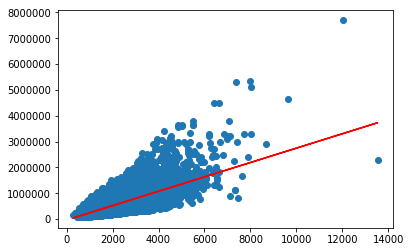

In [186]:
import matplotlib.pyplot as plt
plt.scatter(X_treino,Y_treino)
plt.plot(X_treino, regressor.predict(X_treino), color = 'red')
plt.show()